In [284]:
import mne
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from scipy import signal

matplotlib.rcParams['figure.figsize'] = 18, 7

### Selecting only the most important channels to work with

Those are: Fz, Cz, P3, Pz, P4, PO7, Oz, PO8

Extracting EDF parameters from /Users/statosh/Desktop/UCU/4th year/bio-signals/project/4244171/H S2 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...


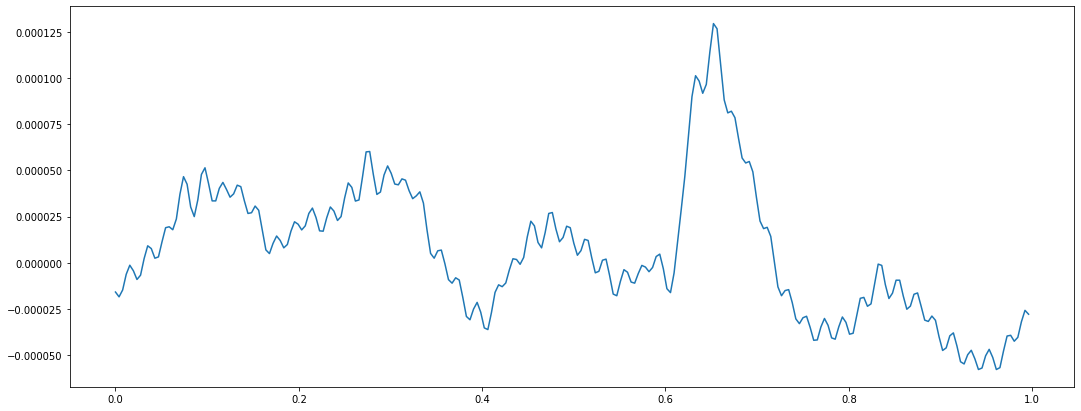

In [197]:
file = mne.io.read_raw_edf('4244171/H S2 TASK.edf', preload=True)
data = file.get_data()
plt.plot(np.arange(0, 1, 1/256), data[0][:256])

In [200]:
file.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 80.0 Hz
 meas_date: 2013-01-12 16:23:35 UTC
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>

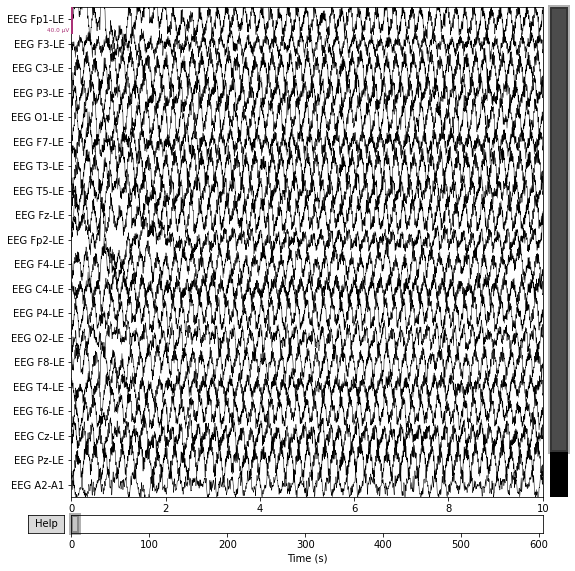

In [198]:
pl = file.plot()

In [199]:
CHANNELS = ['Fz', 'Cz', 'P3', 'Pz', 'P4', 'PO7', 'Oz', 'PO8']

In [402]:
def data_processing(filepath, plot=True):
    file = mne.io.read_raw_edf(filepath, preload=True)
    CHANNELS_MAPPING = {ch_name: ch_name.split()[-1].split('-')[0] for ch_name in file.ch_names}
    
    mne.rename_channels(file.info, CHANNELS_MAPPING)

    montage = mne.channels.make_standard_montage('standard_alphabetic')
    file.set_montage(montage, on_missing='ignore')
    file.drop_channels([c for c in file.ch_names if c not in CHANNELS])

    fig, ax = plt.subplots(figsize=(15, 5))
    file.plot_psd(ax=ax)
                        
    data = file.get_data()

#     chan_dict = {}
#     good_data = mne.pick_channels(file.ch_names, include=channels)
#     for ind in good_data:
#         chan_dict[ind] = file.ch_names[ind]
#     print(chan_dict)

    if plot:
        line1, = plt.plot(np.arange(0, 1, 1/256), 
                 data[0][:256], label='raw')
                 
        plt.title(f'{file.ch_names[0]} channel data')
    
    file_filtered = file.copy().filter(l_freq=1, h_freq=20)
    data_filtered = file_filtered.get_data()
    
    if plot:
        line2, = plt.plot(np.arange(0, 1, 1/256), 
                 data_filtered[0][:256], label='filtered')
        
        plt.legend(handles=[line1, line2])
#         plt.title(f'{list(chan_dict.items())[0][1]} channel data')
        plt.show()
    
    fig, ax = plt.subplots(figsize=(15, 5))
    file_filtered.plot_psd(ax=ax)
    return file, file_filtered

Extracting EDF parameters from /Users/statosh/Desktop/UCU/4th year/bio-signals/project/4244171/H S1 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
Effective window size : 8.000 (s)


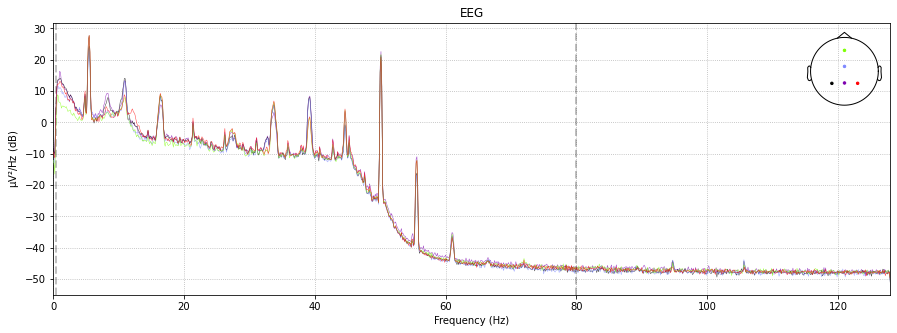

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 sec)



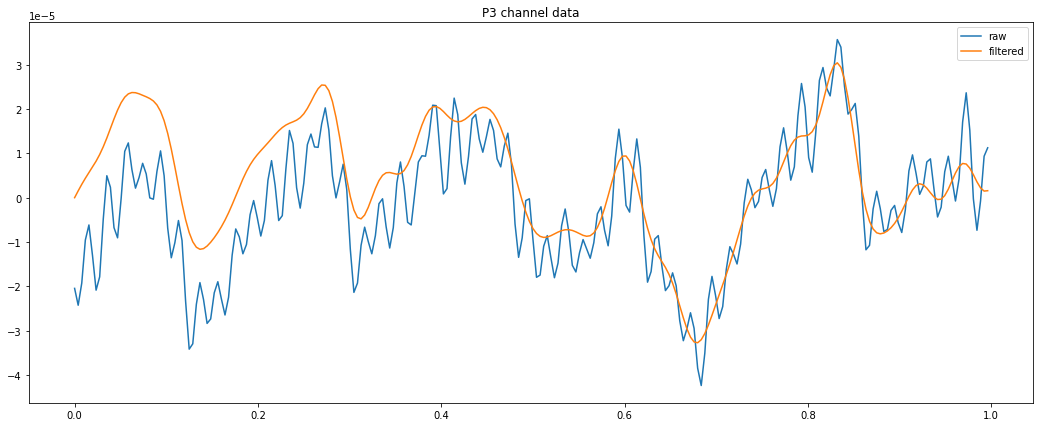

Effective window size : 8.000 (s)


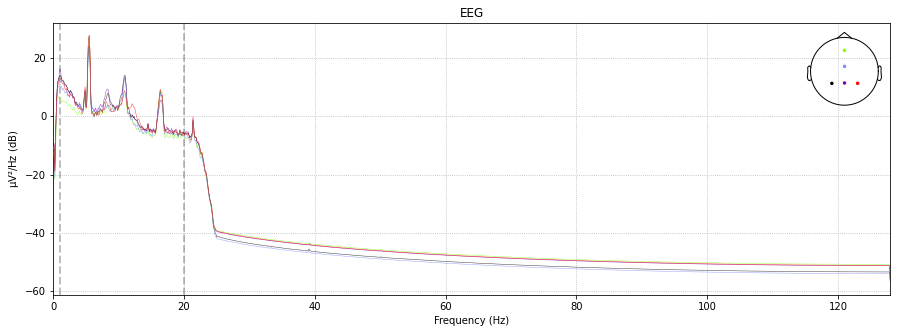

In [403]:
original, file_filtered = data_processing('4244171/H S1 TASK.edf')

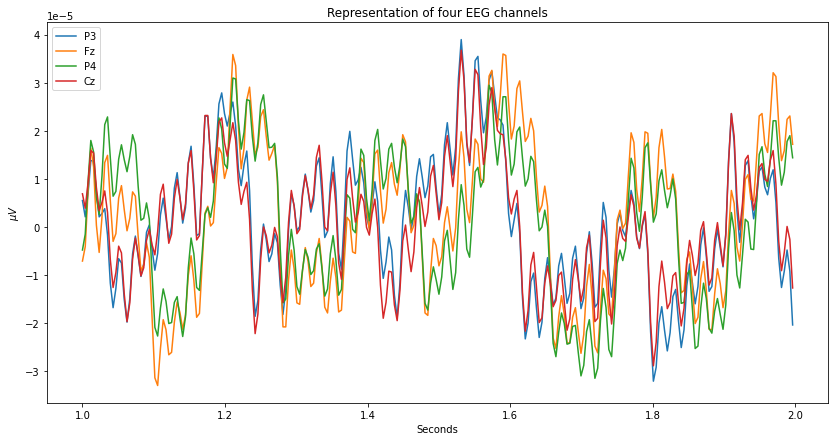

In [404]:
sfreq = original.info['sfreq']
data_ini, times_ini = original[:-1, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(14, 7))
plt.plot(times_ini[:256], data_ini.T[:256]);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Representation of four EEG channels');
plt.legend(original.ch_names[:-1])

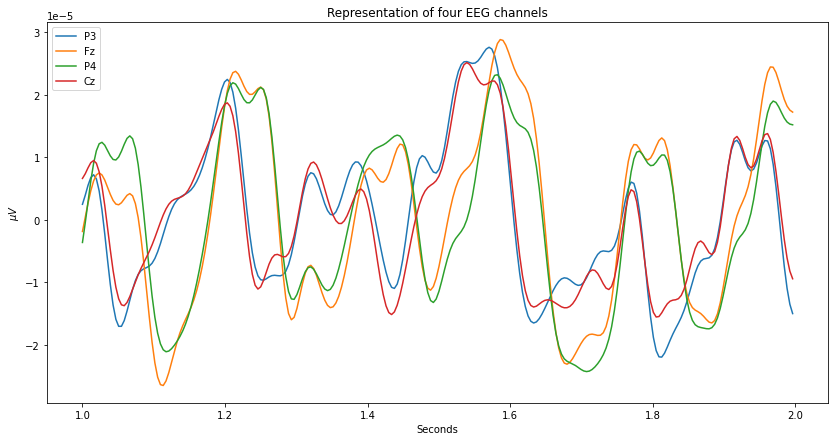

In [405]:
sfreq = file_filtered.info['sfreq']
data_ini, times_ini = file_filtered[:-1, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(14, 7))
plt.plot(times_ini[:256], data_ini.T[:256]);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Representation of four EEG channels');
plt.legend(file_filtered.ch_names[:-1])

### Downsampling

New data frequency 50.0 Hz


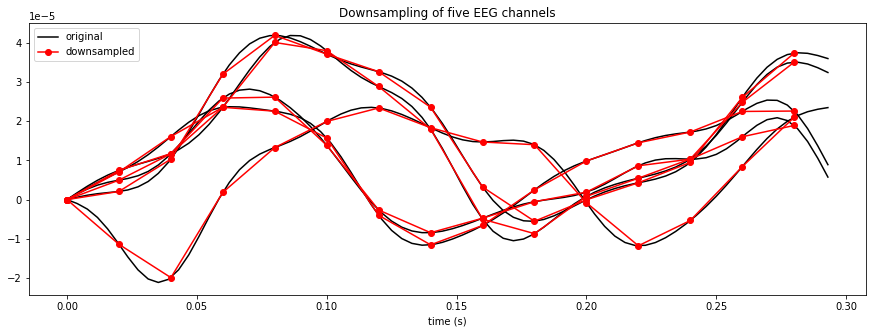

In [406]:
legend_elements = [Line2D([0], [0], color='black', label='original'),
                   Line2D([0], [0], marker='o', color='red', label='downsampled')
                   ]

# Plot a piece of data to see the effects of downsampling
plt.figure(figsize=(15, 5))

n_samples_to_plot = int(0.3 * file_filtered.info['sfreq'])  # plot 0.3 seconds of data
data, times = file_filtered[:, :n_samples_to_plot]
plt.plot(times,data.T, color='black')


# Downsampling
filter_downsamp = file_filtered.copy()
filter_downsamp.resample(50, npad="auto")
print('New data frequency', filter_downsamp.info['sfreq'], 'Hz')

n_samples_to_plot = int(0.3 * filter_downsamp.info['sfreq'])  # plot 0.3 seconds of data
data, times = filter_downsamp[:, :n_samples_to_plot]
plt.plot(times,data.T,'-o', color='red')

plt.xlabel('time (s)')
plt.legend(handles=legend_elements, loc='best')
plt.title('Downsampling of five EEG channels')
plt.show()
# mne.viz.tight_layout()

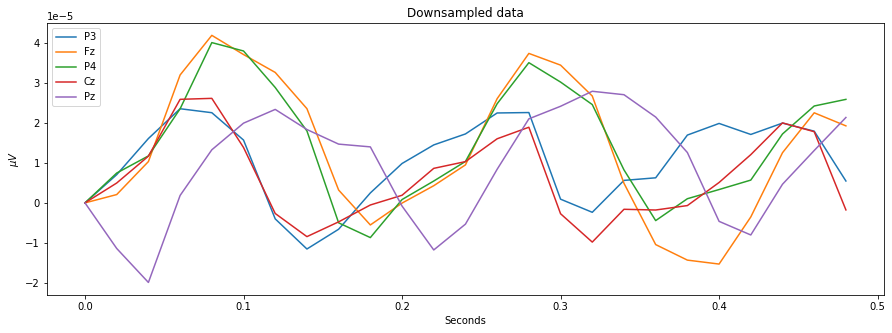

In [407]:
n_samples_to_plot = int(0.5 * filter_downsamp.info['sfreq'])

data_f_1, times_f_1 = filter_downsamp[:, :n_samples_to_plot]
fig = plt.subplots(figsize=(15, 5))
plt.plot(times_f_1, data_f_1.T);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Downsampled data');
plt.legend(filter_downsamp.ch_names);

### ICA 

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.1s.
Creating RawArray with float64 data, n_channels=5, n_times=30250
    Range : 0 ... 30249 =      0.000 ...   604.980 secs
Ready.


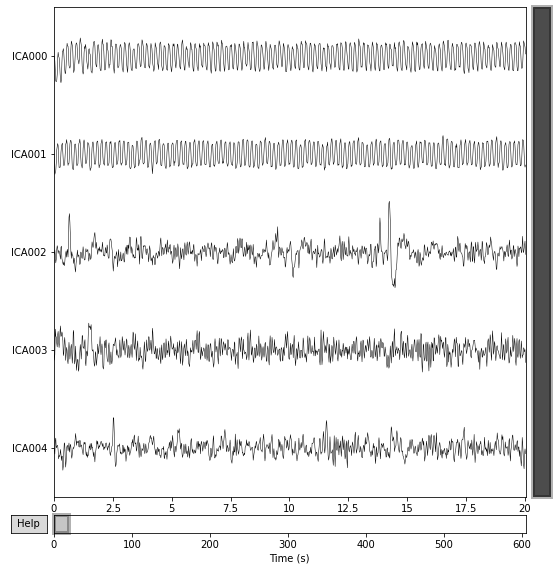

In [408]:
ica = mne.preprocessing.ICA(random_state=97)
ica.fit(filter_downsamp)

filter_ica = filter_downsamp.copy()
filter_ica.load_data()
_ = ica.plot_sources(filter_ica)

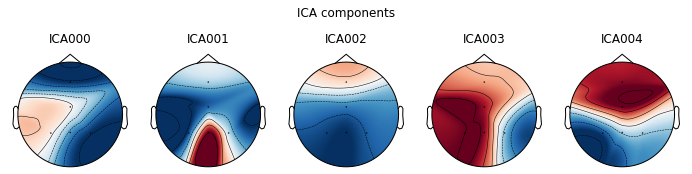

[<MNEFigure size 702x187.56 with 5 Axes>]

In [409]:
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 1 ICA component
    Projecting back using 5 PCA components


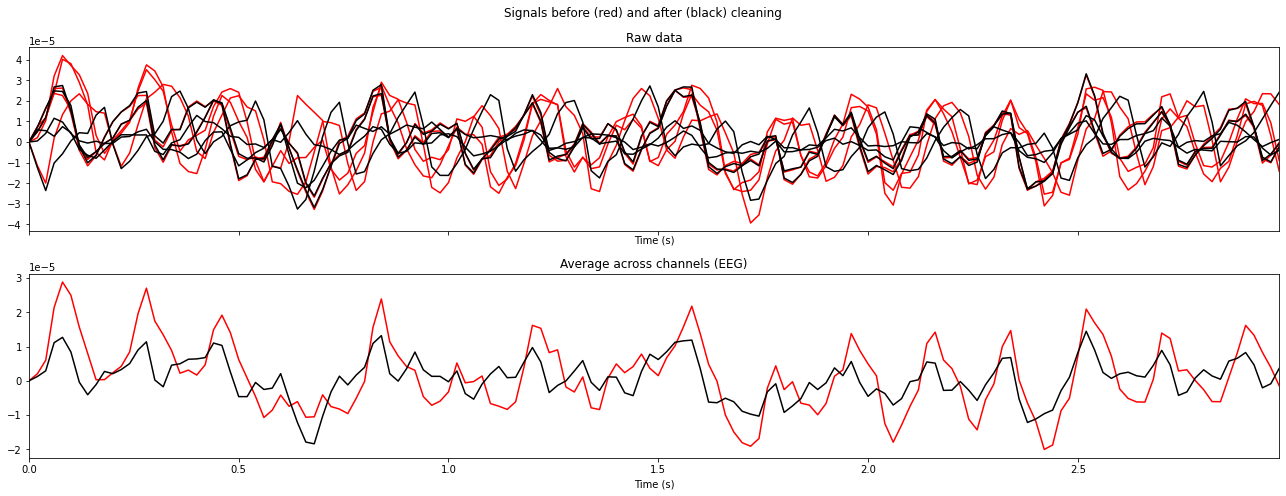

In [410]:
_ = ica.plot_overlay(filter_ica, exclude=[0], picks='eeg')

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
302 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
302 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
302 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


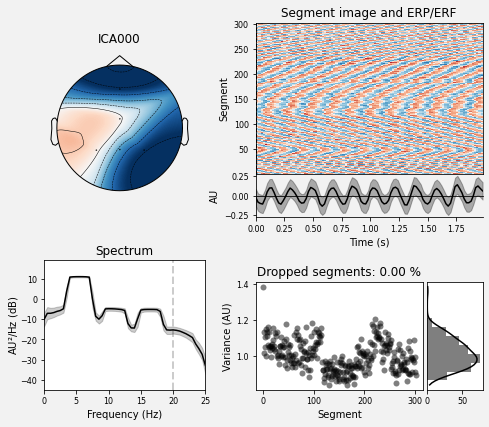

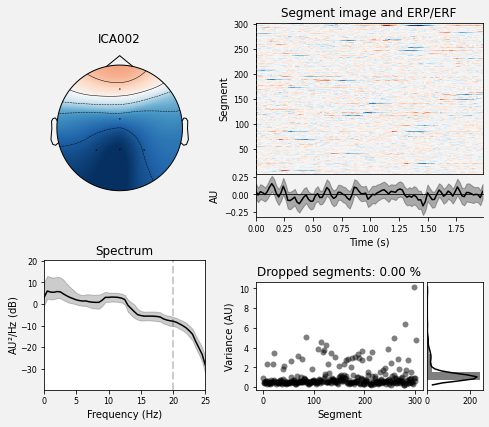

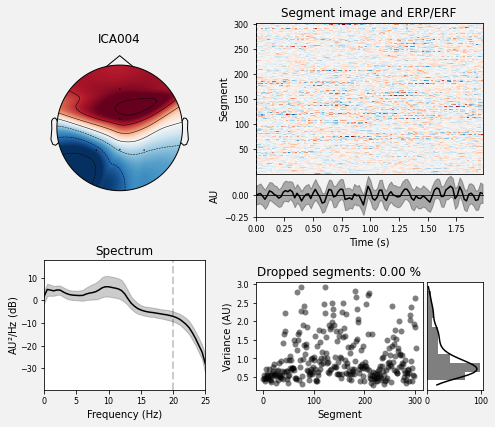

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [411]:
ica.plot_properties(filter_ica, picks=[0, 2, 4])

In [412]:
len(filter_ica.get_data()[3]) / 605
# len(file.get_data()[3])

50.0

In [413]:
max_val = 0
my_peaks = {}
for epoch_s in range(len(filter_ica.get_data()[3])):
    epoch = filter_ica.get_data()[3][epoch_s:min(len(filter_ica.get_data()[3]), 
                                                 epoch_s + 50)]
    if len(epoch) < 49:
        break
    curr_val = max(signal.find_peaks(epoch, 
        height=np.mean(filter_ica.get_data()[3]))[1]['peak_heights'])
#     print(max(signal.find_peaks(epoch, height=np.mean(filter_ica.get_data()[3]))[1]))
    if curr_val > max_val:
        max_val = curr_val
        my_peaks[epoch_s] = max_val
#     break

In [414]:
my_peaks

{0: 2.6167568427369277e-05,
 78: 3.259184484618833e-05,
 2036: 4.848767118190943e-05,
 25776: 5.094424973312365e-05}

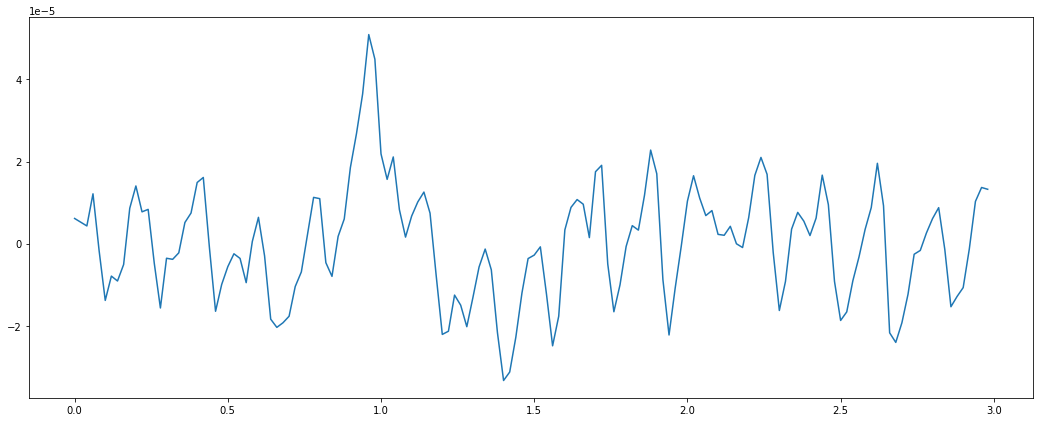

In [442]:
plt.plot(np.arange(0, 3, 1/50), 
         filter_ica.get_data()[3][25776:25776+150], label='raw')

#### DO the same but with sick patient

Extracting EDF parameters from /Users/statosh/Desktop/UCU/4th year/bio-signals/project/4244171/MDD S1 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161791  =      0.000 ...   631.996 secs...
Effective window size : 8.000 (s)


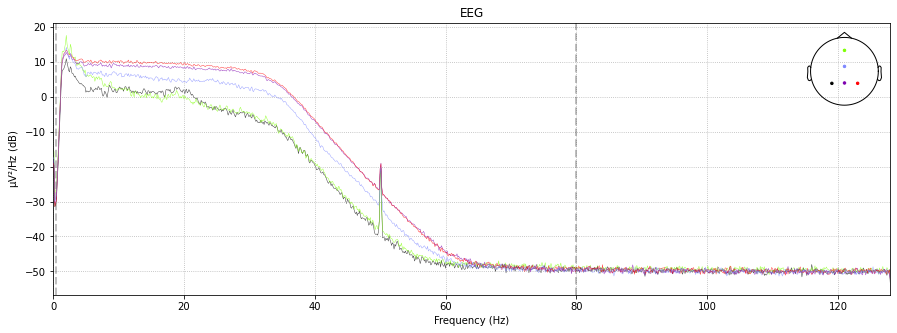

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 sec)



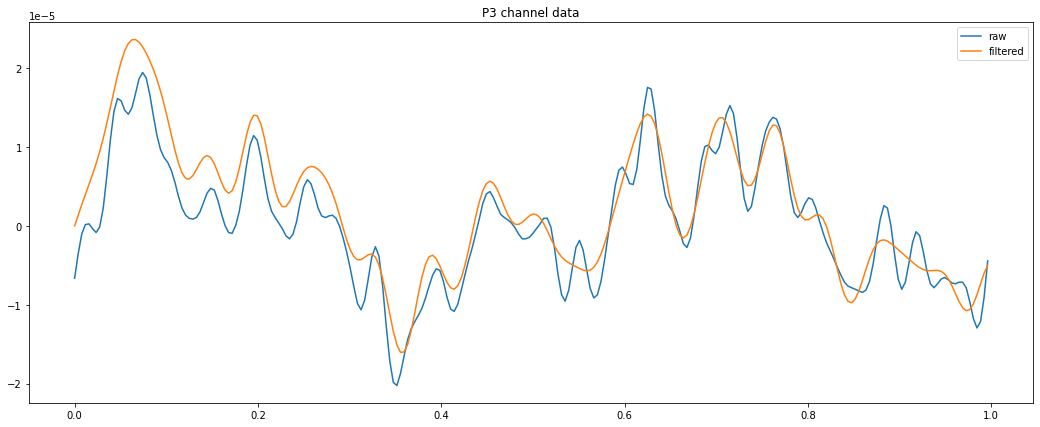

Effective window size : 8.000 (s)


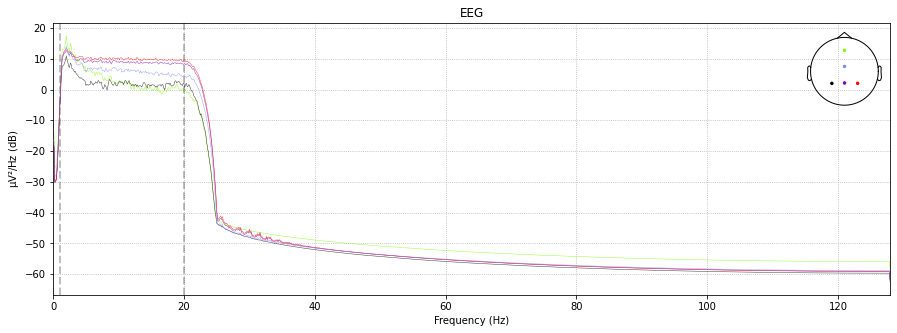

In [430]:
original_sick, file_filtered_sick = data_processing('4244171/MDD S1 TASK.edf')

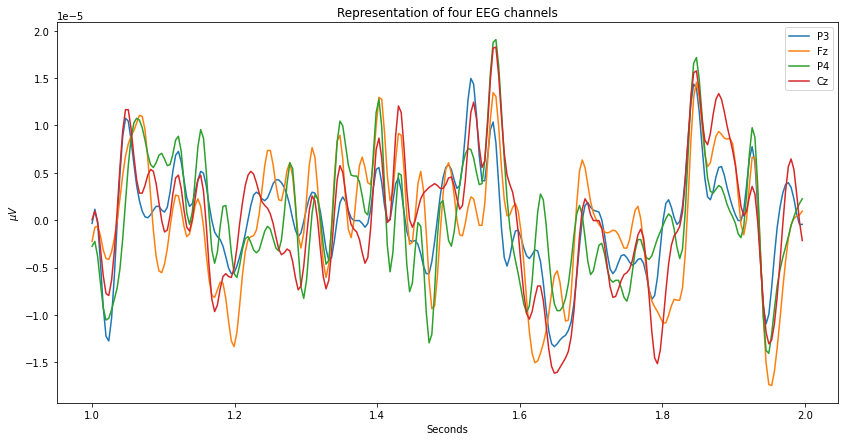

In [431]:
sfreq = original_sick.info['sfreq']
data_ini, times_ini = original_sick[:-1, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(14, 7))
plt.plot(times_ini[:256], data_ini.T[:256]);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Representation of four EEG channels');
plt.legend(original_sick.ch_names[:-1])

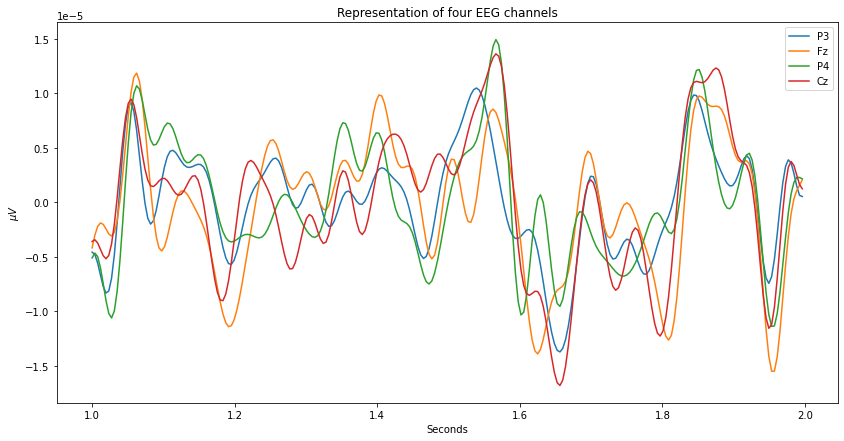

In [432]:
sfreq = file_filtered_sick.info['sfreq']
data_ini, times_ini = file_filtered_sick[:-1, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(14, 7))
plt.plot(times_ini[:256], data_ini.T[:256]);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Representation of four EEG channels');
plt.legend(file_filtered_sick.ch_names[:-1])

New data frequency 50.0 Hz


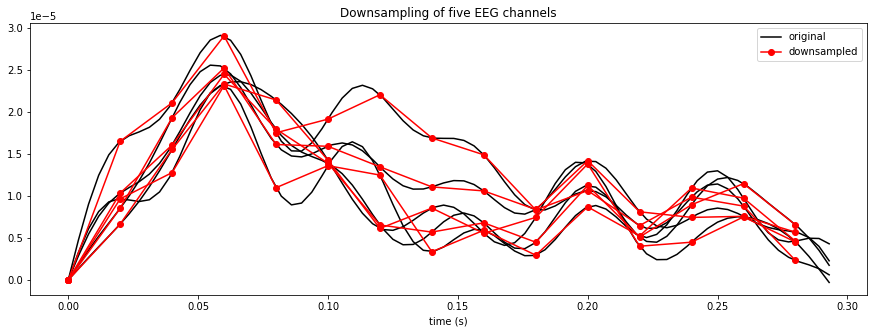

In [434]:
legend_elements = [Line2D([0], [0], color='black', label='original'),
                   Line2D([0], [0], marker='o', color='red', label='downsampled')
                   ]

# Plot a piece of data to see the effects of downsampling
plt.figure(figsize=(15, 5))

n_samples_to_plot = int(0.3 * file_filtered_sick.info['sfreq'])  # plot 0.3 seconds of data
data, times = file_filtered_sick[:, :n_samples_to_plot]
plt.plot(times,data.T, color='black')


# Downsampling
filter_downsamp_sick = file_filtered_sick.copy()
filter_downsamp_sick.resample(50, npad="auto")
print('New data frequency', filter_downsamp_sick.info['sfreq'], 'Hz')

n_samples_to_plot = int(0.3 * filter_downsamp_sick.info['sfreq'])  # plot 0.3 seconds of data
data, times = filter_downsamp_sick[:, :n_samples_to_plot]
plt.plot(times,data.T,'-o', color='red')

plt.xlabel('time (s)')
plt.legend(handles=legend_elements, loc='best')
plt.title('Downsampling of five EEG channels')
plt.show()
# mne.viz.tight_layout()

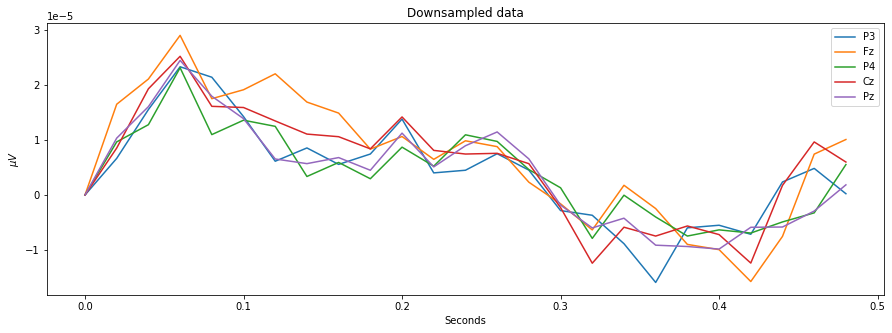

In [435]:
n_samples_to_plot = int(0.5 * filter_downsamp_sick.info['sfreq'])

data_f_1, times_f_1 = filter_downsamp_sick[:, :n_samples_to_plot]
fig = plt.subplots(figsize=(15, 5))
plt.plot(times_f_1, data_f_1.T);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Downsampled data');
plt.legend(filter_downsamp_sick.ch_names);

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.1s.
Creating RawArray with float64 data, n_channels=5, n_times=31600
    Range : 0 ... 31599 =      0.000 ...   631.980 secs
Ready.


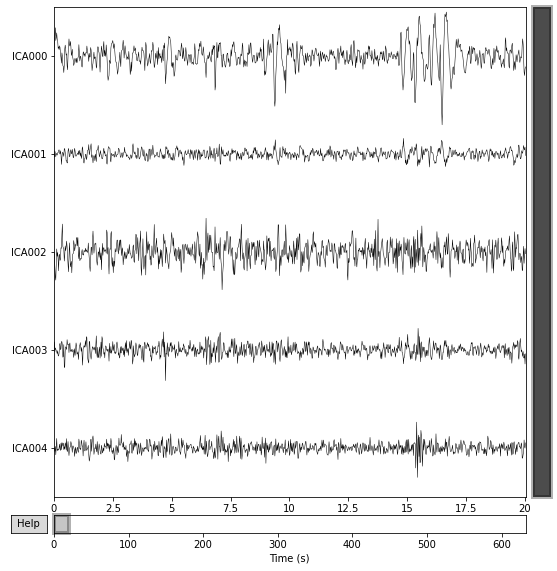

In [436]:
ica = mne.preprocessing.ICA(random_state=97)
ica.fit(filter_downsamp_sick)

filter_ica_sick = filter_downsamp_sick.copy()
filter_ica_sick.load_data()
_ = ica.plot_sources(filter_ica_sick)

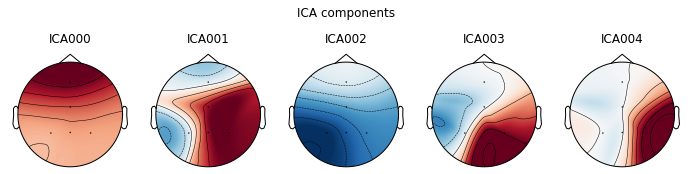

[<MNEFigure size 702x187.56 with 5 Axes>]

In [437]:
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 1 ICA component
    Projecting back using 5 PCA components


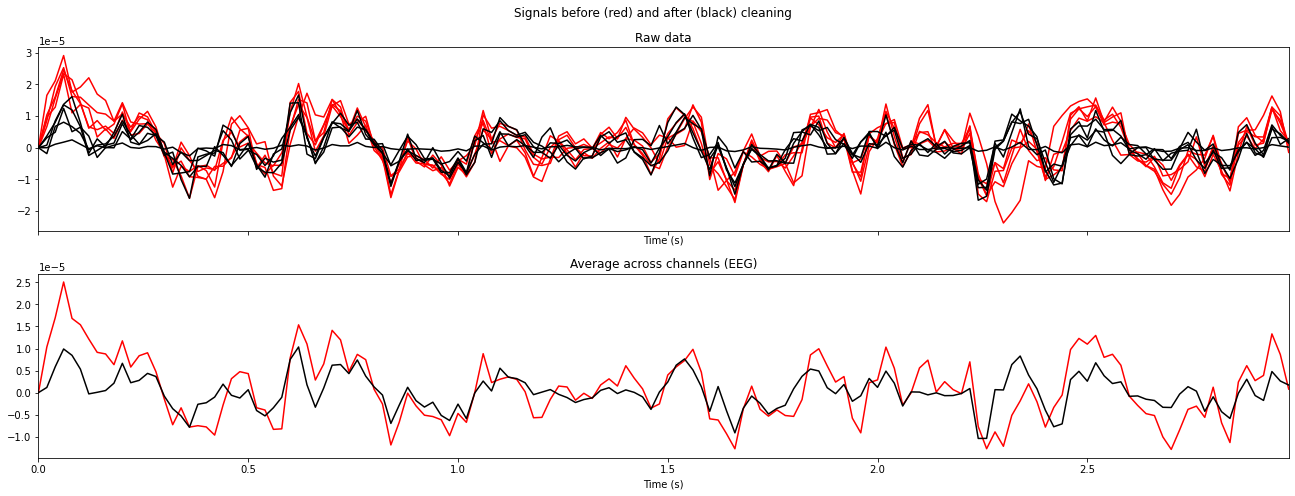

In [438]:
_ = ica.plot_overlay(filter_ica_sick, exclude=[0], picks='eeg')

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
316 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
316 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
316 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


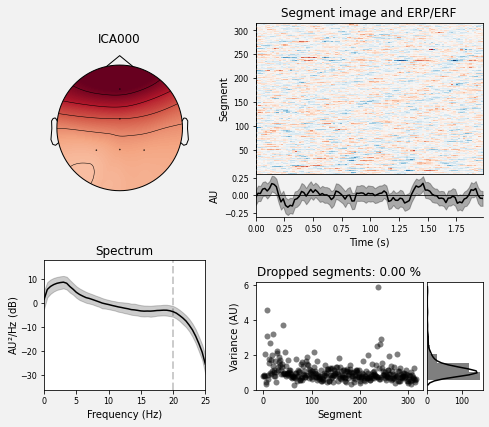

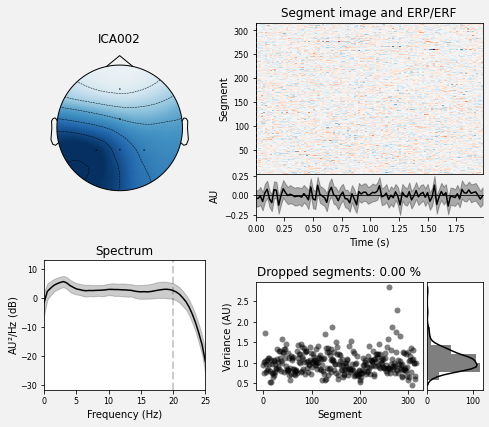

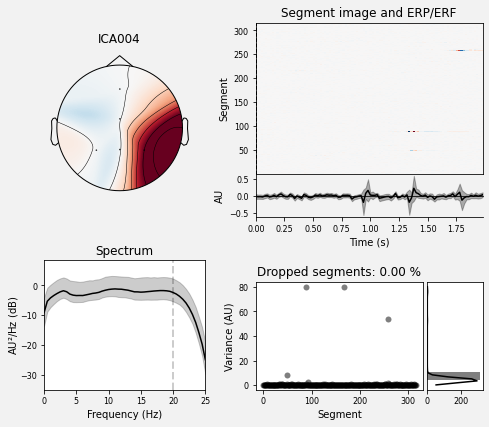

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [439]:
ica.plot_properties(filter_ica_sick, picks=[0, 2, 4])

In [440]:
max_val = 0
my_peaks_sick = {}
for epoch_s in range(len(filter_ica_sick.get_data()[3])):
    epoch = filter_ica_sick.get_data()[3][epoch_s:min(len(filter_ica_sick.get_data()[3]), 
                                                 epoch_s + 50)]
    if len(epoch) < 49:
        break
    curr_val = max(signal.find_peaks(epoch, 
        height=np.mean(filter_ica_sick.get_data()[3]))[1]['peak_heights'])
#     print(max(signal.find_peaks(epoch, height=np.mean(filter_ica.get_data()[3]))[1]))
    if curr_val > max_val:
        max_val = curr_val
        my_peaks_sick[epoch_s] = max_val
#     break

In [441]:
my_peaks_sick

{0: 2.525669066920741e-05,
 431: 2.530373458931928e-05,
 1087: 2.7078011581409345e-05,
 1474: 3.084090574413076e-05,
 4087: 3.1311489318558686e-05,
 4669: 4.198730439831595e-05,
 4917: 5.222927728802004e-05,
 4919: 0.00010311414298974343,
 4922: 0.000457005487308699}

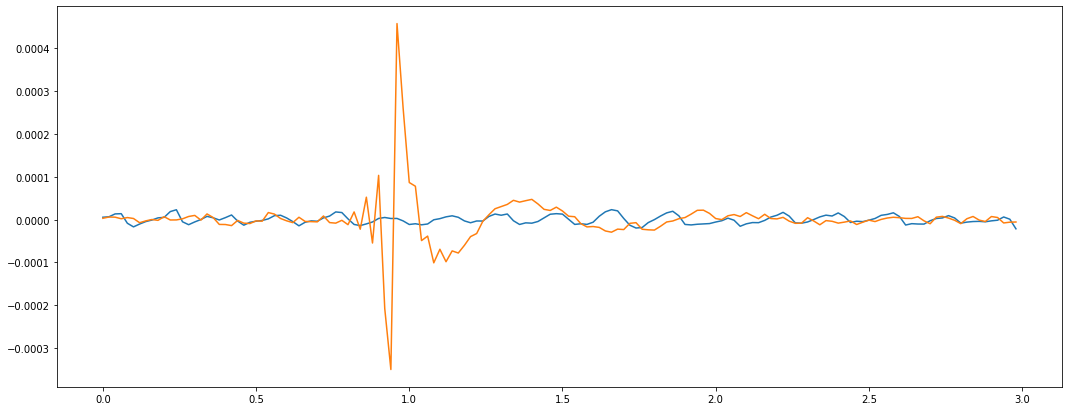

In [445]:
plt.plot(np.arange(0, 3, 1/50), 
         filter_ica.get_data()[3][4922:4922+150], label='healthy')

plt.plot(np.arange(0, 3, 1/50), 
         filter_ica_sick.get_data()[3][4922:4922+150], label='sick')

### Generalized approach (into file)

In [ ]:
def general_function_plots(file_path):
    pass

In [475]:
def main(file_path):
    original, file_filtered = data_processing(file_path, False)
    
    filter_downsamp = file_filtered.copy()
    filter_downsamp.resample(50, npad="auto")
    
    ica = mne.preprocessing.ICA(random_state=97)

    ica.fit(filter_downsamp)

    filter_ica = filter_downsamp.copy()
    filter_ica.load_data()
#     _ = ica.plot_sources(filter_ica)

    max_val = 0
    
    channels_name = []
    
    ind_start = []
    ind_end = []
    
    peaks = []
    
    for ch in range(len(filter_ica.ch_names)):
#         my_peaks = {}
        ch_data = filter_ica.get_data()[ch]
        for epoch_s in range(len(ch_data)):
            epoch = ch_data[epoch_s:min(len(ch_data), epoch_s + 50)]
            if len(epoch) < 49:
                break
            
            try:
                curr_val = max(signal.find_peaks(epoch, 
                    height=np.mean(ch_data))[1]['peak_heights'])
            except:
                curr_val = 0
        #     print(max(signal.find_peaks(epoch, 
#         height=np.mean(filter_ica.get_data()[3]))[1]))
            if curr_val > max_val:
                max_val = curr_val
                peaks.append(max_val)
            else:
                peaks.append(None)
#                 my_peaks[epoch_s] = max_val
        #     break
    
            ind_start.append(epoch_s)
            ind_end.append(epoch_s + 50)
            channels_name.append(filter_ica.ch_names[ch])
            

    results = pd.DataFrame(
        {
            "channel_name": channels_name,
            "ind_start": ind_start,
            "ind_end": ind_end,
            "peaks": peaks       
        }
    )
    
    
    file_name_split = '_'.join(file_path.split('/')[-1].split()[:2])
    results.to_csv(f"results/results_{file_name_split}.csv", index=False)
    
    return filter_ica
#     mne.export.export_raw(f"filter_ica_{file_name_split}.edf", filter_ica)

In [476]:
import glob

all_files_task = glob.glob('4244171/*TASK.edf')

In [493]:
ica_all = []
file_name = []

for f in all_files_task:
    filter_ica = main(f)
    file_name.append(f)
    ica_all.append(filter_ica.get_data())
# print(all_files_task)

results = pd.DataFrame(
    {
        "file_name": file_name,
        "ica": ica_all       
    }
)
file_name_split = '_'.join(f.split('/')[-1].split()[:2])
results.to_csv(f"ica_general.csv", index=False)
    

Extracting EDF parameters from /Users/statosh/Desktop/UCU/4th year/bio-signals/project/4244171/H S7 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 sec)

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.1s.
Extracting EDF parameters from /

- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 sec)

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.1s.
Extracting EDF parameters from /Users/statosh/Desktop/UCU/4th year/bio-signals/project/4244171/H S23 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158719  =      0.000 ...   619.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (

Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.1s.
Extracting EDF parameters from /Users/statosh/Desktop/UCU/4th year/bio-signals/project/4244171/H S16 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162303  =      0.000 ...   633.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 sec)

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA compo

Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 sec)

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.1s.
Extracting EDF parameters from /Users/statosh/Desktop/UCU/4th year/bio-signals/project/4244171/MDD S14 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162559  =      0.000 ...   634.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-ph


Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.0s.
Extracting EDF parameters from /Users/statosh/Desktop/UCU/4th year/bio-signals/project/4244171/MDD S1 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161791  =      0.000 ...   631.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 sec)

Fitting ICA to data using 5 c

Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 sec)

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.1s.
Extracting EDF parameters from /Users/statosh/Desktop/UCU/4th year/bio-signals/project/4244171/H S9 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from

- Filter length: 845 samples (3.301 sec)

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.1s.
Extracting EDF parameters from /Users/statosh/Desktop/UCU/4th year/bio-signals/project/4244171/MDD S16 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163327  =      0.000 ...   637.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples 

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 sec)

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.0s.
Extracting EDF parameters from /Users/statosh/Desktop/UCU/4th year/bio-signals/project/4244171/H S19 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155647  =      0.000 ...   607.996 secs...
Filtering raw data in 1 contigu

### Checking two sample files on data resulted

In [500]:
ica_all_csv = pd.read_csv('ica_general.csv')

In [526]:
h15 = file_name.index('4244171/H S1 TASK.edf')
mdd19 = file_name.index('4244171/MDD S1 TASK.edf')

In [521]:
healthy = pd.read_csv('results/results_H_S1.csv')
sick = pd.read_csv('results/results_MDD_S1.csv')

In [522]:
h15_data = ica_all[h15]
mdd19_data = ica_all[mdd19]

In [523]:
healthy_dropped = healthy.dropna()
sick_dropped = sick.dropna()

In [524]:
healthy_dropped

channel_name  ind_start  ind_end     peaks
0               P3          0       50  0.000027
161             P3        161      211  0.000034
2036            P3       2036     2086  0.000047
6872            P3       6872     6922  0.000048
11405           P3      11405    11455  0.000051
12002           P3      12002    12052  0.000053
15944           P3      15944    15994  0.000060
25776           P3      25776    25826  0.000062
29719           P3      29719    29769  0.000062
86181           P4      25777    25827  0.000064
90124           P4      29720    29770  0.000065

In [525]:
sick_dropped

channel_name  ind_start  ind_end     peaks
0               P3          0       50  0.000023
431             P3        431      481  0.000025
1473            P3       1473     1523  0.000026
4669            P3       4669     4719  0.000036
4921            P3       4921     4971  0.000075
26042           P3      26042    26092  0.000076
36473           Fz       4921     4971  0.000093
68023           P4       4919     4969  0.000213
68026           P4       4922     4972  0.000974

In [516]:
CHANNEL_ORDER = ['P3', 'Fz', 'P4', 'Cz', 'Pz']

In [542]:
avg_healthy = 0
for row in healthy_dropped.index:
#     print(row)
    ch_n = healthy_dropped.loc[row]['channel_name']
    ind_start = healthy_dropped.loc[row]['ind_start']
#     print(ch_n)
    avg_healthy += h15_data[CHANNEL_ORDER.index(ch_n)][ind_start:ind_start + 150]

avg_healthy /= len(healthy_dropped)

avg_sick = 0
for row in sick_dropped.index:
#     print(row)
    ch_n = sick_dropped.loc[row]['channel_name']
    ind_start = sick_dropped.loc[row]['ind_start']
#     print(ch_n)
    avg_sick += mdd19_data[CHANNEL_ORDER.index(ch_n)][ind_start:ind_start + 150]

avg_sick /= len(sick_dropped)

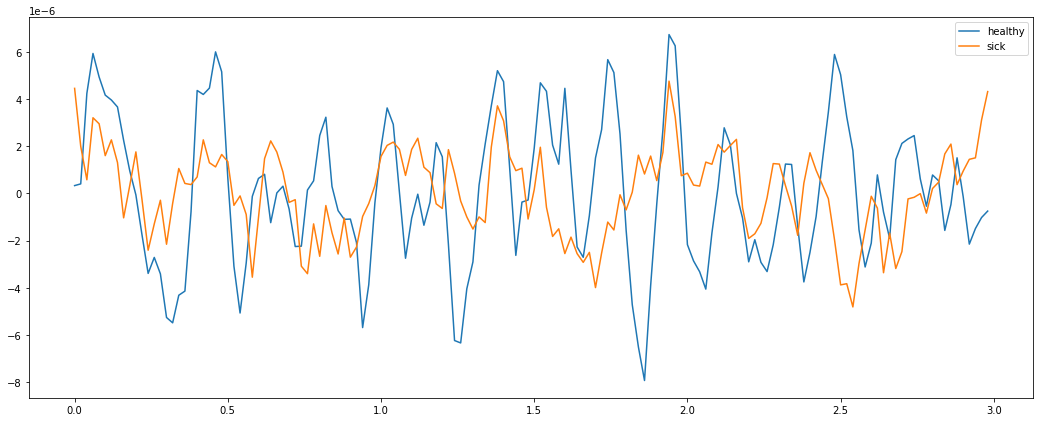

In [543]:
line1,  =  plt.plot(np.arange(0, 3, 1/50), 
         avg_healthy, label='healthy')

line2,  = plt.plot(np.arange(0, 3, 1/50), 
         avg_sick, label='sick')

plt.legend(handles=[line1, line2])

### CLassification

In [547]:
all_files_csv = glob.glob('results/*.csv')

In [553]:
average_sig = []
label = []

for f in all_files_csv:
    f_name_orig = f'4244171/{f.split("_")[1]} {f.split("_")[2].split(".")[0]} TASK.edf'
#     print(f_name_orig)
    patient = file_name.index(f_name_orig)
    patient_data = ica_all[patient]
    
    metadata = pd.read_csv(f)
    metadata_dropped = metadata.dropna()
    
    avg = 0
    not_included = 0
    for row in metadata_dropped.index:
    #     print(row)
        ch_n = metadata_dropped.loc[row]['channel_name']
        ind_start = metadata_dropped.loc[row]['ind_start']
    #     print(ch_n)
        if len(patient_data[CHANNEL_ORDER.index(ch_n)][ind_start:ind_start + 150]) != 150:
            not_included += 1
        else:
            avg += patient_data[CHANNEL_ORDER.index(ch_n)][ind_start:ind_start + 150]

    avg /= (len(metadata_dropped) - not_included)
    average_sig.append(avg)
    if 'H' in f_name_orig:
        label.append(0)
    elif 'MDD' in f_name_orig:
        label.append(1)
        

    
# print(all_files_task)

# results = pd.DataFrame(
#     {
#         "file_name": file_name,
#         "ica": ica_all       
#     }
# )
# file_name_split = '_'.join(f.split('/')[-1].split()[:2])
# results.to_csv(f"ica_general.csv", index=False)

In [569]:
from sklearn.linear_model import LogisticRegression

X, y = average_sig[:-2], label[:-2]

clf = LogisticRegression().fit(X, y)

clf.predict(average_sig[-2:])

# clf.score(X, y)

array([1, 1])

In [573]:
label[-2:]

[1, 0]

In [575]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC()
clf.fit(X, y)

pred = clf.predict(average_sig)

In [576]:
accuracy_score(label, pred)

0.7049180327868853

In [584]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, y)

y_pred = neigh.predict(average_sig)

In [585]:
accuracy_score(label, y_pred)

0.9344262295081968

In [589]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

pred = clf.predict(average_sig)
accuracy_score(label, pred)

0.9672131147540983

In [488]:
ica_all_csv.head()

file_name                                                ica
0     4244171/H S7 TASK.edf  [[-1.05823516e-10  7.06370991e-06  1.61100977e...
1     4244171/H S6 TASK.edf  [[ 3.59502142e-11  6.12458583e-06 -3.56367624e...
2  4244171/MDD S13 TASK.edf  [[-1.29459926e-10  3.97066429e-06  2.92004855e...
3  4244171/MDD S12 TASK.edf  [[ 7.46688249e-11 -6.22075627e-06 -8.04736368e...
4  4244171/MDD S27 TASK.edf  [[-6.80688643e-13 -1.13382799e-04 -2.18124430e...

In [491]:
splitted = [arr[1:] for arr in healthy_data.split('\n')]
for el in splitted:
    splitted_part = el.split(' ')
    print(splitted_part)

['[', '3.08842214e-12', '-1.13919071e-05', '-1.61418822e-05', '...', '-1.01852031e-05']
['', '-4.30301479e-06', '-7.25818980e-06]']
['[', '1.66900456e-10', '-7.97479848e-07', '-1.02607698e-06', '...', '-2.82353065e-05']
['', '-1.60088308e-05', '-1.45972863e-05]']
['[', '6.22074813e-11', '', '9.01019115e-06', '', '2.32986953e-06', '...', '-1.11356614e-05']
['', '-6.66368808e-06', '-1.32647843e-06]']
['[', '1.48507207e-11', '-1.18553741e-05', '-1.26676204e-05', '...', '-1.52186177e-05']
['', '-7.91683848e-06', '-1.31988725e-05]']
['[', '1.55037144e-10', '', '8.29804489e-06', '', '7.18699661e-06', '...', '-1.05078380e-05']
['', '-8.43192020e-06', '-6.42040183e-06]]']


Extracting EDF parameters from /Users/statosh/Desktop/UCU/4th year/bio-signals/project/4244171/H S14 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155391  =      0.000 ...   606.996 secs...
Effective window size : 8.000 (s)


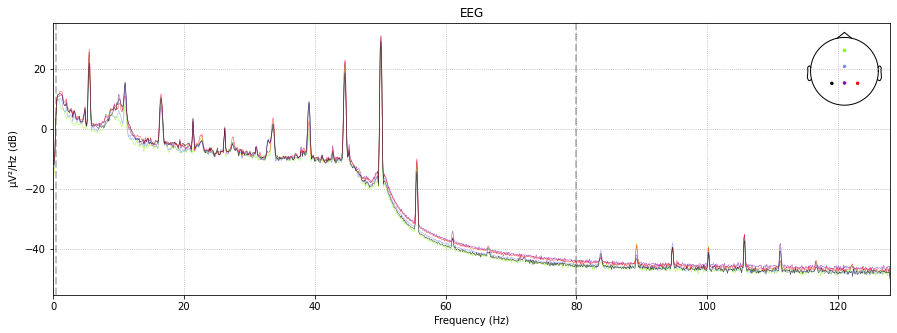

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 sec)



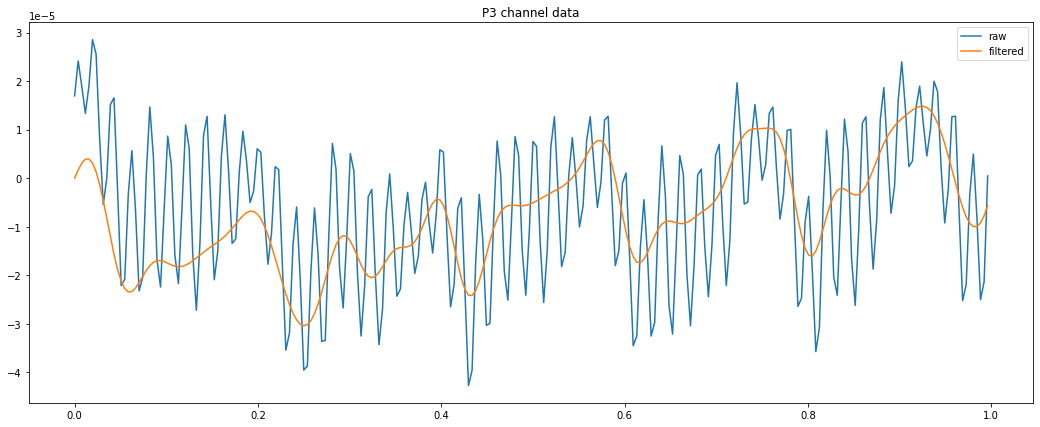

Effective window size : 8.000 (s)


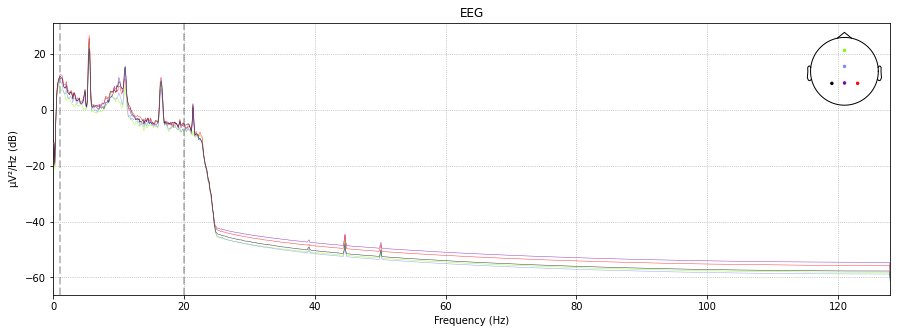

In [514]:
original, file_filtered = data_processing('4244171/H S14 TASK.edf')

In [515]:
file_filtered.ch_names

['P3', 'Fz', 'P4', 'Cz', 'Pz']

In [116]:
def visualize_plot(eeg_channel_keys, eeg_channels_data, visualize):

    for i, ck in enumerate(eeg_channel_keys):
        plt.plot(eeg_channels_data[i])
        plt.xlabel('time index')
        plt.ylabel('amp')
        plt.title(ck)
        plt.savefig(f"{ck.replace(' ', '_')}.png", dpi = 400)
        if visualize == "yes":
            plt.show()
        plt.clf()

In [306]:
def p300_segment(final_eeg_agg, df_timestamps = None, window = 256, scaling_factor = 0.6, div_factor = 1.21, visualize = False):
    """
    takes an eeg signal (filtered)
    detects a sudden peak from a valley in a close proximity with a ratio range
    """
    plt.plot(final_eeg_agg)
    plt.xlabel('time index')
    plt.ylabel('amp')
    plt.title('Aggregated EEG Data')
    plt.savefig("aggregated_eeg.png", dpi = 400)
    if visualize == "yes":
        plt.show()
    plt.clf()

    
    sum_sig = final_eeg_agg
    
    mean_base = np.mean(sum_sig)
    std_base = np.std(sum_sig) * scaling_factor
    
    print("signal stats:")
    print(mean_base)
    print(std_base)
    print('\n\n\n\n')

    # making epochs
    p300_locs = []
    p300_mins = []
    p300_maxs = []
    for epoch_s in range(len(sum_sig)):
        epoch = sum_sig[epoch_s:min(len(sum_sig), epoch_s + window)]
        if len(epoch) < window-1:
#             print(len(epoch))
            break
        
#         print(len(epoch))
        seg_1 = epoch[:len(epoch)//2]
        seg_2 = epoch[len(epoch)//2:]
        # check for p300 conditions
#         print(len(seg_1))
#         print(np.max(seg_1), mean_base)
#         print(np.min(seg_1), (mean_base / div_factor))
        if len(seg_1) and np.max(seg_1) < mean_base and np.min(seg_1) < (mean_base / div_factor):
#             print(np.min(seg_2))
#             print(np.max(seg_2))

#             print('\n')
            if np.min(seg_2) > mean_base and np.max(seg_2) > (mean_base + std_base):
                # this is a p300
                print('Yes')
                p300_locs.append(epoch_s)
                p300_mins.append(np.min(seg_1))
                p300_maxs.append(np.max(seg_2))
                epoch_s += window
#     print()

    # check if two adjacent p300 waves are too close or not
    
    if len(p300_locs) > 1:
        for i in range(1, len(p300_locs)):
            prev_p300 = p300_locs[i-1]
            cur_p300 = p300_locs[i]
            
            if cur_p300 - prev_p300 < window * 2:
                p300_locs[i-1] = p300_locs[i] # replace with the latter one, as there will be some delay in EVP
                p300_mins[i-1] = p300_mins[i]
                p300_maxs[i-1] = p300_maxs[i]
        
    
    plt.plot(sum_sig)
    for i in range(len(p300_locs)):
        plt.gca().add_patch(Rectangle((p300_locs[i],p300_mins[i]),window, p300_maxs[i] - p300_mins[i],
                        edgecolor='orange',
                        facecolor='none',
                        lw=4))
    plt.axhline(y=mean_base, color='r', linestyle='-')
    plt.xlabel('time index')
    plt.ylabel('amp')
    plt.title('P300 annotated')
    plt.savefig("p300_annotated.png", dpi = 400)
    if visualize == "yes":
        plt.show()
    plt.clf()

    p300_locs = list(set(p300_locs))
    print("detected p300 locations (refined):")
    print(p300_locs)
    print(f"window: {window}")
    if df_timestamps is not None:
        print("timestamps:")
        print([df_timestamps[i] for i in p300_locs])

    # result write
    timestamps = []
    sigs = []
    sig_ids = []
    sum_sig = list(sum_sig)
    if df_timestamps is not None and len(df_timestamps) != len(sum_sig):
        print("signal length mismatch")
    for i, pl in enumerate(p300_locs):
        timestamps.extend(  df_timestamps[ max(pl - window, 0) : min(pl + window, len(df_timestamps)) ]  )
        sigs.extend(  sum_sig[ max(pl - window, 0) : min(pl + window, len(df_timestamps)) ]  )
        n = len(sum_sig[ max(pl - window, 0) : min(pl + window, len(df_timestamps)) ])
        sig_ids.extend([f"p300_sig_id_{i}"]*n)

    results = pd.DataFrame(
        {
            "timestamps": timestamps,
            "agg_signal": sigs,
            "p300_signal_id": sig_ids
        }
    )

    try:
        print("saving results")
        results.to_csv("results.csv", index=False)
    except Exception as e:
        print(e)
        print("could not save the results due to path issues")

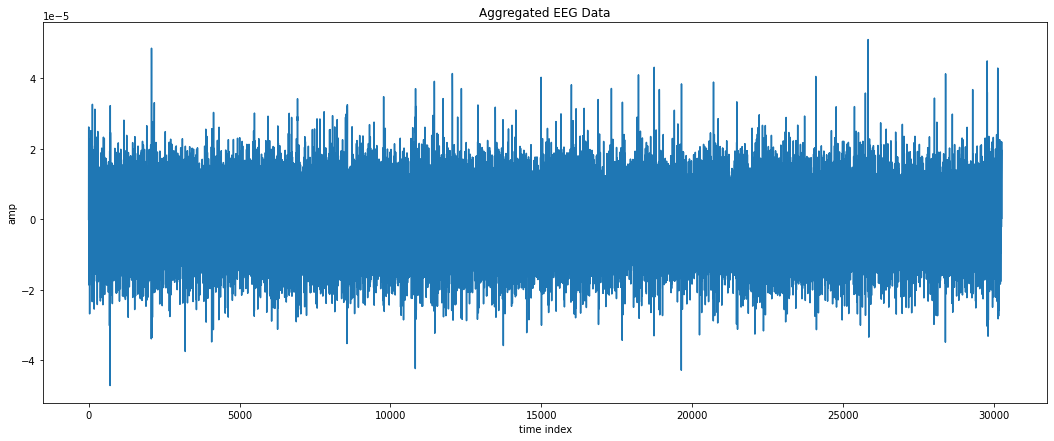

signal stats:
1.0472571893127265e-08
6.360291249006531e-06







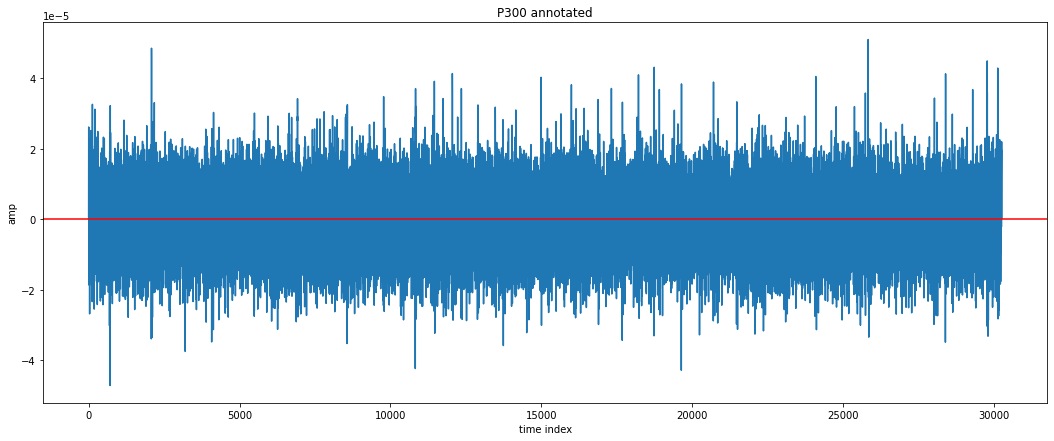

detected p300 locations (refined):
[]
window: 256
saving results


<Figure size 1296x504 with 0 Axes>

In [307]:
p300_segment(final_eeg_agg=filter_ica.get_data()[3], visualize='yes')

In [151]:
data[new_file.ch_names.index('EEG Pz-LE')]

array([-2.20516823e-05, -3.04523232e-05, -2.75521019e-05, ...,
        2.72520790e-05,  1.47511254e-05,  5.35040818e-06])

In [107]:
pd.read_csv('results.csv')

Empty DataFrame
Columns: [timestamps, agg_signal, p300_signal_id]
Index: []